In [485]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [486]:
lead = pd.read_csv('Leads.csv')
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [487]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [488]:
lead.isnull().mean().sort_values(ascending = False)*100

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [489]:
null_value_cols = lead.columns[lead.isnull().sum()>0]

In [490]:
null_value_cols

Index(['Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Tags', 'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], dtype='object')

In [491]:
# one by one lets look at the unique value that they contain

for col in null_value_cols : 
    print(f'======================={col}================')
    print(lead[col].unique())



=======================Lead Source================
['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']
=======================TotalVisits================
[  0.   5.   2.   1.   4.   8.  11.   6.   3.   7.  13.  17.  nan   9.
  12.  10.  16.  14.  21.  15.  22.  19.  18.  20.  43.  30.  23.  55.
 141.  25.  27.  29.  24.  28.  26.  74.  41.  54. 115. 251.  32.  42.]
=======================Page Views Per Visit================
[ 0.    2.5   2.    1.    4.    8.    2.67 11.    5.    6.    3.    1.33
  1.5   3.5   7.    2.33 13.    8.5   5.5   1.67   nan  4.5   3.33 16.
 12.    1.71  1.8   6.5   4.33 14.    3.4  10.    1.25  1.75  2.63 15.
  2.25  3.67  1.43  9.    2.6   4.75  1.27  3.25  5.33  2.57  2.17  2.75
  2.8   2.2   2.86  3.91  1.4   5.67  3.2   1.3

In [492]:
lead[null_value_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 17 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Source                                    9204 non-null   object 
 1   TotalVisits                                    9103 non-null   float64
 2   Page Views Per Visit                           9103 non-null   float64
 3   Last Activity                                  9137 non-null   object 
 4   Country                                        6779 non-null   object 
 5   Specialization                                 7802 non-null   object 
 6   How did you hear about X Education             7033 non-null   object 
 7   What is your current occupation                6550 non-null   object 
 8   What matters most to you in choosing a course  6531 non-null   object 
 9   Tags                                           5887 

In [493]:
#### Accessing the importance of categorical variables using chisquare testing

from scipy.stats import chi2_contingency
import pandas as pd

# Assuming df is your DataFrame and 'target' is your target column
for col in lead[null_value_cols].select_dtypes(include=['object', 'category']).columns:
    contingency_table = pd.crosstab(lead[col], lead['Converted'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f'Chi-Square test for {col}: p-value = {p}')

Chi-Square test for Lead Source: p-value = 4.0834502966012515e-212
Chi-Square test for Last Activity: p-value = 1.269441954093108e-298
Chi-Square test for Country: p-value = 0.4552761871725188
Chi-Square test for Specialization: p-value = 0.00011786276295395725
Chi-Square test for How did you hear about X Education: p-value = 0.0012597836614521012
Chi-Square test for What is your current occupation: p-value = 4.0070810643261665e-128
Chi-Square test for What matters most to you in choosing a course: p-value = 0.6198474529719338
Chi-Square test for Tags: p-value = 0.0
Chi-Square test for Lead Quality: p-value = 0.0
Chi-Square test for Lead Profile: p-value = 1.5638454824905612e-201
Chi-Square test for City: p-value = 2.293769752363562e-08
Chi-Square test for Asymmetrique Activity Index: p-value = 1.2300644022164393e-40
Chi-Square test for Asymmetrique Profile Index: p-value = 6.817677487947714e-34


In [494]:
lead['Specialization'].value_counts()

Specialization
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [495]:
lead['City'].value_counts()

City
Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [496]:
#### Dropping the Column with null values greater than  25% 
all_cols = lead.columns 
drop_cols = []

In [497]:
 for col in all_cols : 
     if lead[col].isnull().mean() > 0.25 : 
         drop_cols.append(col)

drop_cols

['Country',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'Lead Quality',
 'Lead Profile',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [498]:
for col in drop_cols : 
    print(f'=============={col}==============')
    print(lead[col].value_counts())

==============Country==============
Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1

In [499]:
lead = lead.drop(drop_cols, axis = 1 )
 

In [500]:
lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity', 'Specialization', 'How did you hear about X Education', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity'], dtype='object')

In [501]:
lead.isnull().mean().sort_values(ascending = False)

How did you hear about X Education          0.238853
Specialization                              0.155628
City                                        0.153680
TotalVisits                                 0.014827
Page Views Per Visit                        0.014827
Last Activity                               0.011147
Lead Source                                 0.003896
Prospect ID                                 0.000000
Newspaper                                   0.000000
A free copy of Mastering The Interview      0.000000
I agree to pay the amount through cheque    0.000000
Get updates on DM Content                   0.000000
Update me on Supply Chain Content           0.000000
Receive More Updates About Our Courses      0.000000
Through Recommendations                     0.000000
Digital Advertisement                       0.000000
Search                                      0.000000
X Education Forums                          0.000000
Newspaper Article                           0.

In [502]:
lead['How did you hear about X Education'].value_counts()

How did you hear about X Education
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

#### Conveerting NULL Values of How did you hear about X Education into Select 

In [504]:
lead.loc[lead['How did you hear about X Education'].isnull() , 'How did you hear about X Education'] = 'Select'

In [505]:
lead['How did you hear about X Education'].value_counts()

How did you hear about X Education
Select                   7250
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

In [506]:
lead.isnull().mean().sort_values(ascending = False)

Specialization                              0.155628
City                                        0.153680
TotalVisits                                 0.014827
Page Views Per Visit                        0.014827
Last Activity                               0.011147
Lead Source                                 0.003896
Prospect ID                                 0.000000
X Education Forums                          0.000000
A free copy of Mastering The Interview      0.000000
I agree to pay the amount through cheque    0.000000
Get updates on DM Content                   0.000000
Update me on Supply Chain Content           0.000000
Receive More Updates About Our Courses      0.000000
Through Recommendations                     0.000000
Digital Advertisement                       0.000000
Newspaper                                   0.000000
Search                                      0.000000
Newspaper Article                           0.000000
Magazine                                    0.

In [507]:
lead['Specialization'].value_counts()

Specialization
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

##### Converting NULL Values of Specialization into Select

In [509]:
lead.loc[lead['Specialization'].isnull() ,'Specialization'] = 'Select'

In [510]:
lead['Specialization'].value_counts()

Specialization
Select                               3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [511]:
lead['City'].value_counts()

City
Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [512]:
lead['City'].isnull().sum()

1420

##### Converting null values of City to Select

In [514]:
lead.loc[lead['City'].isnull(), 'City'] = 'Select'

In [515]:
lead.isnull()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9236,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9237,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9238,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [516]:
lead.isnull().sum().sort_values(ascending = False)

TotalVisits                                 137
Page Views Per Visit                        137
Last Activity                               103
Lead Source                                  36
Prospect ID                                   0
X Education Forums                            0
A free copy of Mastering The Interview        0
I agree to pay the amount through cheque      0
City                                          0
Get updates on DM Content                     0
Update me on Supply Chain Content             0
Receive More Updates About Our Courses        0
Through Recommendations                       0
Digital Advertisement                         0
Newspaper                                     0
Search                                        0
Newspaper Article                             0
Magazine                                      0
Lead Number                                   0
How did you hear about X Education            0
Specialization                          

In [517]:
lead['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [518]:
lead['TotalVisits'].nunique()


41

In [519]:
lead['TotalVisits'].value_counts()

TotalVisits
0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: count, dtype: int64

##### 0 has occured maximum number of times. Lets replace null values of Total Visits with 0

In [521]:
lead.loc[lead['TotalVisits'].isnull(),'TotalVisits'] = 0

In [522]:
lead['TotalVisits'].isnull().sum()

0

In [523]:
lead.isnull().sum()

Prospect ID                                   0
Lead Number                                   0
Lead Origin                                   0
Lead Source                                  36
Do Not Email                                  0
Do Not Call                                   0
Converted                                     0
TotalVisits                                   0
Total Time Spent on Website                   0
Page Views Per Visit                        137
Last Activity                               103
Specialization                                0
How did you hear about X Education            0
Search                                        0
Magazine                                      0
Newspaper Article                             0
X Education Forums                            0
Newspaper                                     0
Digital Advertisement                         0
Through Recommendations                       0
Receive More Updates About Our Courses  

In [524]:
lead['Page Views Per Visit'].value_counts()

Page Views Per Visit
0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: count, Length: 114, dtype: int64

##### 0 has occured maximum number of times. Lets replace null values of Page Views Per Visit with 0

In [526]:
lead.loc[lead['Page Views Per Visit'].isnull(),'Page Views Per Visit'] = 0

In [527]:
lead['Page Views Per Visit'].isnull().sum()

0

In [528]:
lead['Last Activity'].value_counts()

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

##### Email Opened is the last activity of most people replacing nulls with Email Opened

In [530]:
lead.loc[lead['Last Activity'].isnull(), 'Last Activity'] = 'Email Opened'

In [531]:
lead['Lead Source'].value_counts()

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

##### Google is the lead source therofore replacing null n=lead source to Google

In [533]:
lead.loc[lead['Lead Source'].isnull(),'Lead Source'] = 'Google'

In [534]:
lead.isnull().mean().sort_values(ascending =  False)

Prospect ID                                 0.0
Magazine                                    0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
City                                        0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Search                                      0.0
Lead Number                                 0.0
How did you hear about X Education          0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website                 0.0
TotalVisits                             

##### All null values are dealt with

### Numeric Features Distribution

In [537]:
import seaborn as sns
import matplotlib.pyplot as plt

In [538]:
numeric_columns = lead.select_dtypes(include = 'number').columns

In [539]:
numeric_columns

Index(['Lead Number', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'], dtype='object')

#### Histplot of numeric cols 

C:\Users\nikhil.rai\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


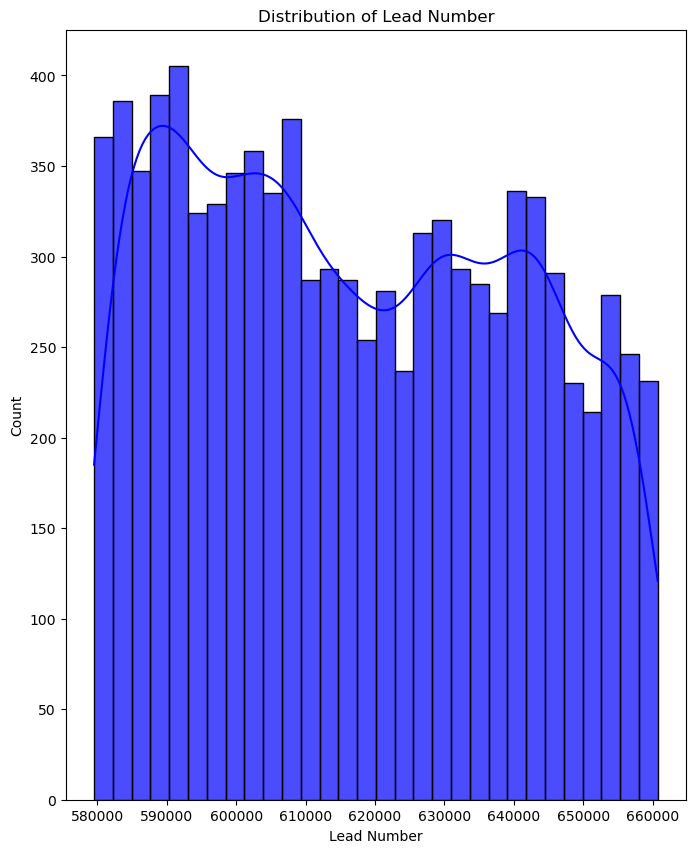

C:\Users\nikhil.rai\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


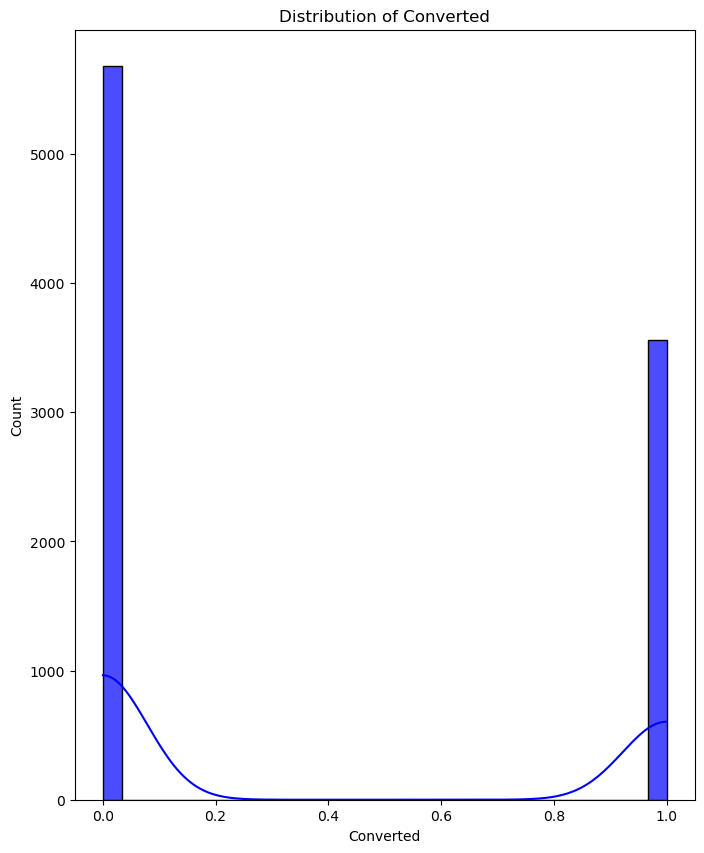

C:\Users\nikhil.rai\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


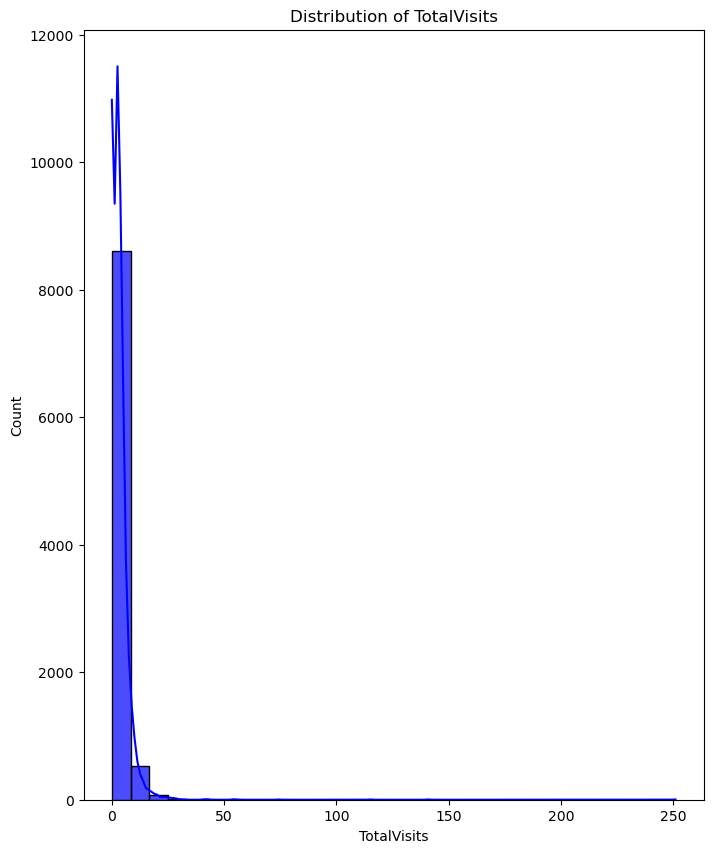

C:\Users\nikhil.rai\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


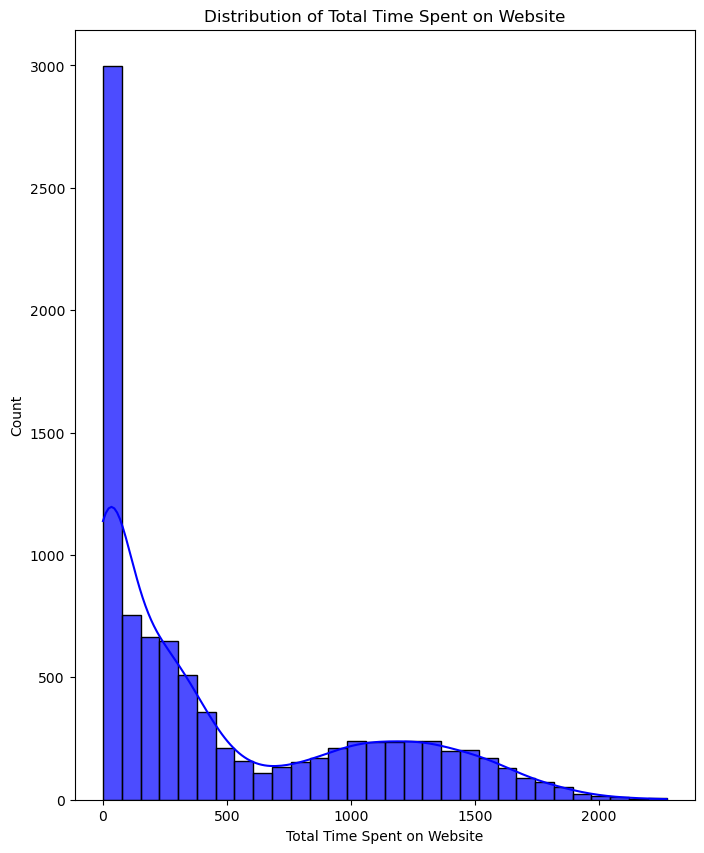

C:\Users\nikhil.rai\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


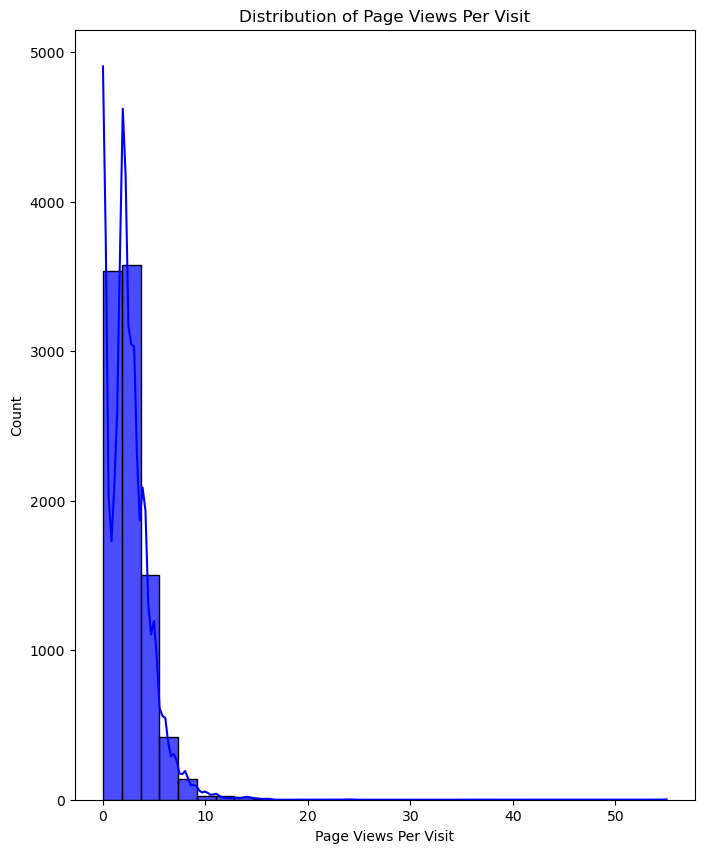

In [541]:
for col in numeric_columns : 
    plt.figure(figsize = (8,10))
    sns.histplot(data = lead, x = col,kde = True, bins = 30, color = 'blue', alpha = 0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel   = col
    plt.ylabel = 'frequency'
    plt.show()

C:\Users\nikhil.rai\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


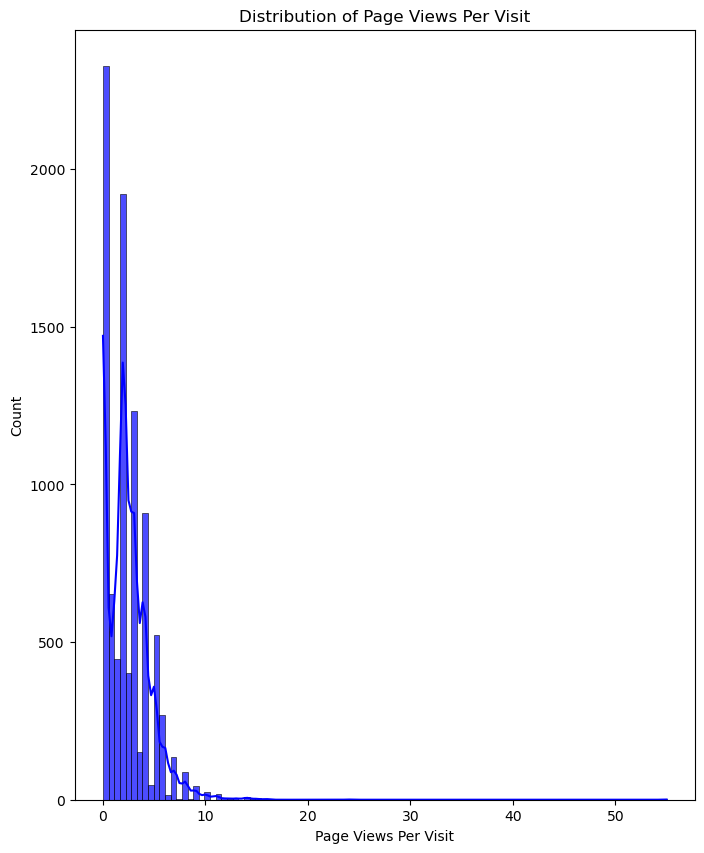

In [542]:
plt.figure(figsize = (8,10))
col = 'Page Views Per Visit'
sns.histplot(data = lead, x = 'Page Views Per Visit',kde = True, bins = 100, color = 'blue', alpha = 0.7)
plt.title(f'Distribution of Page Views Per Visit')
plt.xlabel   = 'Page Views Per Visit'
plt.ylabel = 'frequency'
plt.show()  
    

In [543]:
lead['Page Views Per Visit'].value_counts()

Page Views Per Visit
0.00    2326
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: count, Length: 114, dtype: int64

In [544]:
lead.groupby(['Lead Number']).agg( count = ('Lead Number' , 'count')).sort_values(ascending = False, by = 'count')

,count
Lead Number,
579533,1
629593,1
630390,1
630403,1
630405,1
...,...
602534,1
602540,1
602557,1


In [545]:
lead.groupby(['Lead Number']).agg({'Lead Number' : 'count'})

,Lead Number
Lead Number,
579533,1
579538,1
579545,1
579546,1
579564,1
...,...
660681,1
660719,1
660727,1


In [546]:
lead = lead.drop('Lead Number', axis = 1)

In [547]:
lead.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity', 'Specialization', 'How did you hear about X Education', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity'], dtype='object')

#### 2.Target Variable Distribution

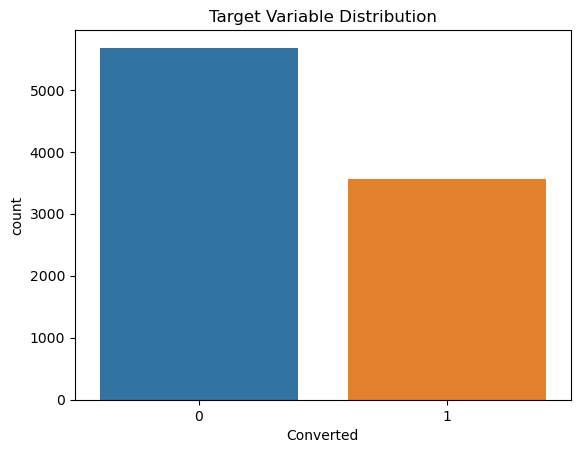

In [549]:
sns.countplot(x = 'Converted', data = lead)
plt.title('Target Variable Distribution')
plt.show()

#### 3.Numeric feature vs Target

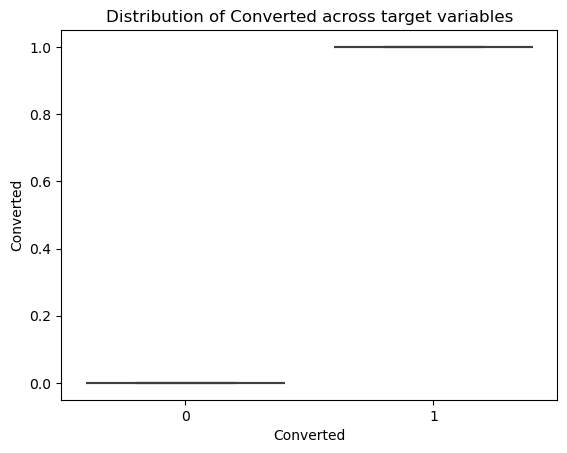

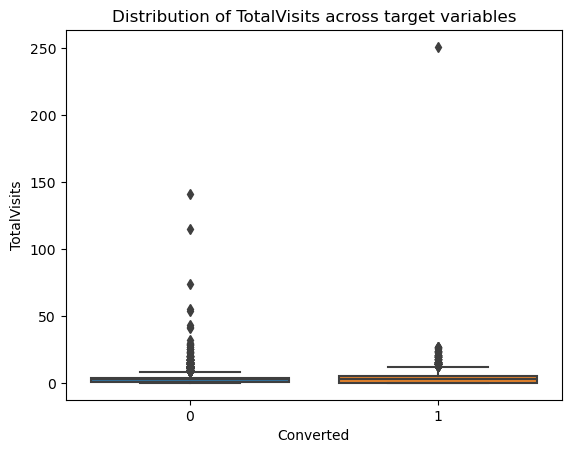

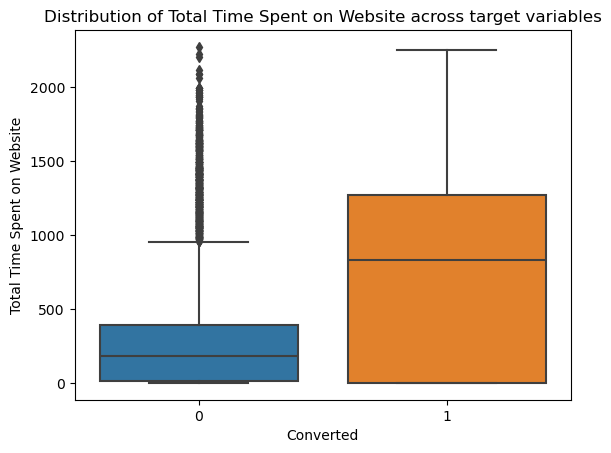

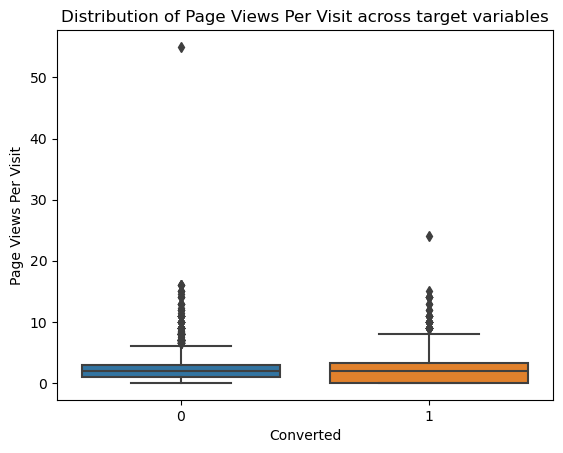

In [551]:
for col in lead.select_dtypes(include = 'number').columns : 
    sns.boxplot(data = lead,x = 'Converted', y = col)
    plt.title(f'Distribution of {col} across target variables')
    plt.show()

#### Calculating IQR for Total Visits

In [553]:
Q1 = lead[lead['Converted'] == 0 ]['TotalVisits'].quantile(0.25)
Q3 = lead[lead['Converted'] == 0 ]['TotalVisits'].quantile(0.75)

In [554]:
IQR = Q3 - Q1

In [555]:
# Define outlier boundas 
lower_bound = Q1 - 1.5*IQR 
upper_bound = Q3 + 1.5*IQR 
print(f'lower_bound : {lower_bound}, upper_bound : {upper_bound}') 

lower_bound : -3.5, upper_bound : 8.5


In [556]:
outliers = lead[  ( (lead['TotalVisits'] < lower_bound) | (lead['TotalVisits'] > upper_bound) ) & (lead['Converted'] == 0) ]

In [557]:
outliers.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
58,d93bfdc0-4719-4f0a-ad6b-31070823dfbb,Landing Page Submission,Organic Search,No,No,0,17.0,409,8.5,Email Opened,Human Resource Management,Select,No,No,No,No,No,No,No,No,No,No,Mumbai,No,Yes,Modified
59,d22bfe40-a444-4e97-b6b7-ccf40117710b,Landing Page Submission,Referral Sites,No,No,0,11.0,685,5.5,Email Opened,Services Excellence,Select,No,No,No,No,No,No,No,No,No,No,Thane & Outskirts,No,Yes,Email Opened
93,40e72a2f-b7bb-4a10-9c2c-45d9bedb0dde,Landing Page Submission,Google,No,No,0,9.0,838,4.5,Email Opened,Healthcare Management,Word Of Mouth,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Email Opened
102,d103d8be-52e8-41aa-850a-6651f10641c6,Landing Page Submission,Google,No,No,0,12.0,809,4.0,Unreachable,Finance Management,Online Search,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified
106,1c4f389a-53d9-4c8a-b4f7-7954b4053ebd,API,Google,No,No,0,9.0,125,3.0,Page Visited on Website,Select,Select,No,No,No,No,No,No,No,No,No,No,Select,No,No,Modified


In [559]:
Q1 = lead[lead['Converted'] == 1 ]['TotalVisits'].quantile(0.25)
Q3 = lead[lead['Converted'] == 1 ]['TotalVisits'].quantile(0.75)

In [560]:
IQR = Q3 - Q1

In [561]:
# Define outlier boundas 
lower_bound = Q1 - 1.5*IQR 
upper_bound = Q3 + 1.5*IQR 
print(f'lower_bound : {lower_bound}, upper_bound : {upper_bound}') 

lower_bound : -7.5, upper_bound : 12.5


In [562]:
outliers = lead[  ( (lead['TotalVisits'] < lower_bound) | (lead['TotalVisits'] > upper_bound) ) & (lead['Converted'] == 1) ]

In [563]:
outliers.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
56,59e722da-edff-43d9-af61-f5c8bcc986c4,Landing Page Submission,Referral Sites,No,No,1,13.0,436,13.00,Form Submitted on Website,IT Projects Management,Online Search,No,No,No,No,No,No,No,No,No,No,Other Metro Cities,No,No,Modified
345,b852d04d-932a-4afd-8ab6-5be1b22ca1cf,Landing Page Submission,Organic Search,No,No,1,21.0,1113,2.63,Email Opened,Operations Management,Select,No,No,No,No,No,No,No,No,No,No,Mumbai,No,Yes,Email Opened
554,c6b11191-4aec-482d-80c9-b7e656d3faa0,Landing Page Submission,Organic Search,No,No,1,13.0,373,6.50,Email Opened,E-COMMERCE,Select,No,No,No,No,No,No,No,No,No,No,Other Metro Cities,No,Yes,Email Opened
663,f45f8039-d948-4004-9e1b-c56efbab9747,Landing Page Submission,Google,No,No,1,21.0,1885,3.50,Email Opened,Business Administration,Select,No,No,No,No,No,No,No,No,No,No,Mumbai,No,Yes,Email Opened
818,4cb2a48d-e9d2-4845-acb1-baaad08c8c07,Lead Add Form,Reference,No,No,1,16.0,1570,5.33,Page Visited on Website,Select,Select,No,No,No,No,No,No,No,No,No,No,Select,No,No,Page Visited on Website


#### The outliers of TotalVisits appears to be a genuine entry

Let's do the same analysis for Page Views Per Visit and Total time spent

In [566]:
for col in ['Page Views Per Visit', 'Total Time Spent on Website'] : 
    for conv_val in range(1) : 
        print(f'================{col} {conv_val}')
        Q1 = lead[lead['Converted'] == conv_val ][col].quantile(0.25)
        Q3 = lead[lead['Converted'] == conv_val ]['TotalVisits'].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5*IQR 
        upper_bound = Q3 + 1.5*IQR 
        
        outliers = lead[  ( (lead[col] < lower_bound) | (lead[col] > upper_bound) ) & (lead['Converted'] == 1) ]
        print(outliers) 
        
        
    
    

================Page Views Per Visit 0
                  Prospect ID                    Lead Origin          Lead Source   Do Not Email Do Not Call  Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit       Last Activity                  Specialization           How did you hear about X Education Search Magazine Newspaper Article X Education Forums Newspaper Digital Advertisement Through Recommendations Receive More Updates About Our Courses Update me on Supply Chain Content Get updates on DM Content             City             I agree to pay the amount through cheque A free copy of Mastering The Interview  Last Notable Activity  
12    8bf76a52-2478-476b-8618-1688e07874ad                      API  Organic Search       No          No          1         11.0                 1538                      11.0                       Email Opened               Marketing Management                       Select         No      No             No               No             

In [567]:
print(range(1))

range(0, 1)


All outliers appear to be genuine values. So, let's cap them

In [569]:
for col in ['Page Views Per Visit', 'Total Time Spent on Website','TotalVisits'] : 
    for conv_val in range(1) :
        Q1 = lead[lead['Converted'] == conv_val ][col].quantile(0.25)
        Q3 = lead[lead['Converted'] == conv_val ][col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5*IQR 
        upper_bound = Q3 + 1.5*IQR 

        lead.loc[lead['Converted'] == conv_val,col ] = np.where( 
                                                                lead[lead['Converted'] == conv_val ][col] < lower_bound, lower_bound,
                                                                np.where(lead[lead['Converted'] == conv_val ][col] > upper_bound, upper_bound
                                                                ,lead[lead['Converted'] == conv_val ][col])
                                        
                                                        )
        
        
        

C:\Users\nikhil.rai\AppData\Local\Temp\ipykernel_17668\1631504905.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[  0.  674.  305.  ... 958.5 238.  199. ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  lead.loc[lead['Converted'] == conv_val,col ] = np.where(


### Categorical Features Distribution

In [571]:
categorical_cols = lead.select_dtypes(include = 'object').columns
print(categorical_cols)

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Specialization', 'How did you hear about X Education', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity'], dtype='object')


In [572]:
for col in categorical_cols :
    print(f'====={col}========')
    print(lead[col].value_counts())

=====Prospect ID========
Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: count, Length: 9240, dtype: int64
=====Lead Origin========
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
=====Lead Source========
Lead Source
Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook           

In [573]:
little_to_no_variation = ['Prospect ID','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content','Receive More Updates About Our Courses','Through Recommendations','Do Not Email','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement']

In [574]:
little_to_no_variation

['Prospect ID',
 'I agree to pay the amount through cheque',
 'Get updates on DM Content',
 'Update me on Supply Chain Content',
 'Receive More Updates About Our Courses',
 'Through Recommendations',
 'Do Not Email',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement']

In [575]:
lead = lead.drop(little_to_no_variation, axis = 1)

In [576]:
categorical_cols = lead.select_dtypes(include = 'object').columns
print(categorical_cols)

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'How did you hear about X Education', 'City', 'A free copy of Mastering The Interview', 'Last Notable Activity'], dtype='object')


In [577]:
for col in categorical_cols : 
    print('='*20,col,'='*20)
    print(lead[col].value_counts())

==================== Lead Origin ====================
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
==================== Lead Source ====================
Lead Source
Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64
==================== Last Activity ====================
Last Activity
Email Opened                    3540
SMS

### Dummification of categorical columns

In [579]:
lead = pd.get_dummies(lead, columns = categorical_cols, drop_first = True)
lead.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Select,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,0,5.0,674.0,2.5,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False

In [580]:
bool_columns = lead.select_dtypes(include = 'bool').columns

In [581]:
bool_columns

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic', 'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM', 'Lead Source_Olark Chat', 'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release', 'Lead Source_Reference', 'Lead Source_Referral Sites', 'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_Welingak Website', 'Lead Source_bing', 'Lead Source_blog', 'Lead Source_google', 'Lead Source_testone', 'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel', 'Last Activity_Converted to Lead', 'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam', 'Last Activity_Email Opened', 'Last Activity_Email Received', 'Last Activity_Form Submitted on Website', 'Last Activity_Had a Phone Conversation', 'Last Activity_Olark Chat Conversation',
       'Last Acti

In [475]:
lead[bool_columns] = lead[bool_columns].astype(int)

In [477]:
select_cols = [col for col in lead.columns   if 'Select' in col ] 
print( select_cols) 

['Specialization_Select', 'How did you hear about X Education_Select', 'City_Select']


#### Dropping the columns with select as they don't add any value.

In [661]:
lead = lead.drop(select_cols, axis = 1 )


In [481]:
lead.columns

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic', 'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM', 'Lead Source_Olark Chat', 'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release', 'Lead Source_Reference', 'Lead Source_Referral Sites', 'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_Welingak Website', 'Lead Source_bing', 'Lead Source_blog', 'Lead Source_google', 'Lead Source_testone', 'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel', 'Last Activity_Converted to Lead', 'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam', 'Last Activity_Email Opened', 'Last Activity_Email Received', 'Last Activity_Form Submitted on Website', 'Last Activity_Had a Phone Conversation', 'Last Activity_Olark Chat Conversation',
       'Last Acti

##### Dropping the converted column as we are now going to train the model

In [663]:
lead_sample = lead.drop('Converted', axis = 1 )

In [665]:
lead_sample.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic', 'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM', 'Lead Source_Olark Chat', 'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release', 'Lead Source_Reference', 'Lead Source_Referral Sites', 'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_Welingak Website', 'Lead Source_bing', 'Lead Source_blog', 'Lead Source_google', 'Lead Source_testone', 'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel', 'Last Activity_Converted to Lead', 'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam', 'Last Activity_Email Opened', 'Last Activity_Email Received', 'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Ph

#### Test-Train Split

In [667]:
X = lead.drop('Converted',axis =  1 )

In [669]:
y = lead['Converted']

In [671]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [673]:
scaler = StandardScaler() 

In [675]:
numeric_cols = X_train.select_dtypes(include = 'number').columns.tolist()

In [677]:
numeric_cols

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [679]:
X_train[numeric_columns].head()

KeyError: "['Lead Number', 'Converted'] not in index"

In [681]:
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])

KeyError: "['Lead Number', 'Converted'] not in index"

In [683]:
X_train[numeric_columns].head()

KeyError: "['Lead Number', 'Converted'] not in index"

In [685]:
X_train.corr()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
TotalVisits,1.000000,0.240553,0.501411,0.308845,-0.194044,-0.053990,-0.009341,0.103334,-0.052112,0.139819,-0.013211,0.010862,-0.329501,0.198933,-0.000683,NaN,-0.168463,0.042976,-0.003006,-0.003569,-0.075431,-0.008583,0.002203,0.015955,NaN,NaN,0.002203,-0.068586,-0.043907,-0.021092,0.003116,0.020776,0.007976,0.014472,0.019371,-0.141852,0.192532,NaN,0.011463,0.016002,0.004574,0.035269,0.002203,0.050250,0.016266,0.024387,0.052966,0.039566,0.020520,0.060165,0.034682,0.035750,0.021710,0.048769,0.040223,0.022111,0.026292,0.010549,0.088480,0.069277,0.017853,0.040339,0.116122,0.058758,0.008543,0.031020,0.054674,0.077302,0.056217,0.037517,0.052467,0.073374,0.017825,0.214231,-0.007617,-0.009695,0.003116,0.052348,0.007976,NaN,0.035156,-0.127179,-0.034367,0.194015,NaN,0.011070,0.003520,0.005586,0.013748
Total Time Spent on Website,0.240553,1.000000,0.349558,0.273702,-0.128813,-0.045484,0.043203,0.126761,-0.043934,0.205640,-0.015895,0.011623,-0.387329,0.107018,-0.008169,NaN,-0.101880,-0.001641,0.003311,0.017836,-0.066304,-0.012204,0.005386,0.006119,NaN,NaN,0.000720,-0.016448,-

In [687]:
correlation_matrix = X_train.corr()

In [689]:
mask = np.triu(np.ones_like(correlation_matrix, dtype = bool))
mask

array([[ True,  True,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False, False,  True]])

In [691]:
threshold = 0.8 

In [693]:
high_corr = correlation_matrix.where(~mask).stack().reset_index()

In [695]:
high_corr.columns = ['Feature_1', 'Feature_2', 'Correlation']

In [699]:
high_corr_filtered = high_corr.loc[(abs(high_corr['Correlation']) > threshold)]

In [701]:
pd.set_option('display.width', 1000)  # Adjust width to a large number
pd.set_option('display.max_columns', None)  # Ensure all columns are displayed
pd.set_option('display.colheader_justify', 'center')

In [703]:
print(high_corr_filtered)

                     Feature_1                             Feature_2              Correlation
33                        Lead Source_Facebook           Lead Origin_Lead Import   0.973529  
109                      Lead Source_Reference         Lead Origin_Lead Add Form   0.870640  
2511  Last Notable Activity_Email Link Clicked  Last Activity_Email Link Clicked   0.804447  
2583   Last Notable Activity_Email Marked Spam   Last Activity_Email Marked Spam   1.000000  
2656        Last Notable Activity_Email Opened        Last Activity_Email Opened   0.845987  
2730      Last Notable Activity_Email Received      Last Activity_Email Received   1.000000  
3115            Last Notable Activity_SMS Sent            Last Activity_SMS Sent   0.849364  
3276        Last Notable Activity_Unsubscribed        Last Activity_Unsubscribed   0.849177  


There is huge correlation between Feature_1 and Feature_2  dropping Feature_2 columns from X_train and X_test

In [705]:
print(high_corr_filtered['Feature_1'])

33                          Lead Source_Facebook
109                        Lead Source_Reference
2511    Last Notable Activity_Email Link Clicked
2583     Last Notable Activity_Email Marked Spam
2656          Last Notable Activity_Email Opened
2730        Last Notable Activity_Email Received
3115              Last Notable Activity_SMS Sent
3276          Last Notable Activity_Unsubscribed
Name: Feature_1, dtype: object


In [707]:
print(high_corr_filtered['Feature_2'])

33               Lead Origin_Lead Import
109            Lead Origin_Lead Add Form
2511    Last Activity_Email Link Clicked
2583     Last Activity_Email Marked Spam
2656          Last Activity_Email Opened
2730        Last Activity_Email Received
3115              Last Activity_SMS Sent
3276          Last Activity_Unsubscribed
Name: Feature_2, dtype: object


In [709]:
drop_feature_2 = high_corr_filtered['Feature_2']

In [711]:
drop_feature_2

33               Lead Origin_Lead Import
109            Lead Origin_Lead Add Form
2511    Last Activity_Email Link Clicked
2583     Last Activity_Email Marked Spam
2656          Last Activity_Email Opened
2730        Last Activity_Email Received
3115              Last Activity_SMS Sent
3276          Last Activity_Unsubscribed
Name: Feature_2, dtype: object

In [713]:
X_train = X_train.drop(drop_feature_2, axis = 1 )

In [715]:
set(X_train.columns).intersection(set(drop_feature_2))

set()

In [717]:
len(X_train.columns)

81

In [719]:
for col in X_train.columns : 
    print('='*20,col,'='*20)
    print( X_train[col].value_counts())

==================== TotalVisits ====================
TotalVisits
0.0      1612
2.0      1163
3.0       921
4.0       794
5.0       553
6.0       314
1.0       272
8.5       250
7.0       218
8.0       165
9.0        53
10.0       37
11.0       35
14.0       15
13.0       13
12.0       12
16.0        7
15.0        6
18.0        5
21.0        5
27.0        3
19.0        3
20.0        3
24.0        2
23.0        2
17.0        2
22.0        1
26.0        1
251.0       1
Name: count, dtype: int64
==================== Total Time Spent on Website ====================
Total Time Spent on Website
0.0       1523
958.5      488
60.0        15
234.0       14
78.0        13
          ... 
1181.0       1
933.0        1
1859.0       1
1155.0       1
1809.0       1
Name: count, Length: 1455, dtype: int64
==================== Page Views Per Visit ====================
Page Views Per Visit
0.00     1612
2.00     1255
3.00      835
4.00      638
1.00      445
         ... 
1.19        1
12.00       1
6.3

#### Train the logistic Regression Model

In [721]:
with open('output.txt', 'w') as f:
    print( print( X_train[col].value_counts()), file=f)

Last Notable Activity_View in browser link Clicked
False    6467
True        1
Name: count, dtype: int64
